# Project: Investigate a Dataset - [TMDb dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **For my analysis, I will be using TMDb Movie data.**


### Dataset Description 


> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The data set contains 21 columns:
    1. movie_id - A unique identifier for each movie.
    2. imdb_id - A unique identifier for each movie on IMDB.
    3. cast - The name of lead and supporting actors.
    4. director - the director of the movie
    5. budget - The budget in which the movie was made.
    6. genre - The genre of the movie, Action, Comedy ,Thriller etc.
    7. homepage - A link to the homepage of the movie.
    8. id - This is infact the movie_id as in the first dataset.
    9. keywords - The keywords or tags related to the movie.
    10. original_title - The title of the movie before translation or adaptation.
    11. overview - A brief description of the movie.
    12. popularity - A numeric quantity specifying the movie popularity.
    13. production_companies - The production house of the movie.
    14. production_countries - The country in which it was produced.
    15. release_date - The date on which it was released.
    16. revenue - The worldwide revenue generated by the movie.
    17. runtime - The running time of the movie in minutes.
    18. tagline - Movie's tagline.
    19. vote_average - average ratings the movie recieved.
    20. budget_adj - shows the budget associated movie in terms of 2010 dollars.
    21. revenue_adj - shows the revenue associated movie in terms of 2010 dollars.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


> ## **Questions**  
   1. <a href=#q1>Is a certain genre more successful than others?/Which genres are most popular?</a>
   2. <a href=#q2>Top 10 movies revenue wise.</a>
   3. <a href=#q3> What kinds of properties are associated with movies that have high revenues?</a>

### Now we start by importing the required libraries for our analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> **Let's load the data and see what we got**
    

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
TMDb_df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")


In [3]:
TMDb_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
TMDb_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
TMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (also some features have over 50% of 0-value in them). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights in relation to the questions I asked. Let's just remove (imdb_id) and the features with NaN values or zero values.

    


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

> *__1-Removing unnecessary columns__*:
            <p> For the questions,I asked we don't need these columns tagline, keywords,..., id, imdb_id.</p>
            <p>The code cell below does drop these columns.</p>

>
> **We also create different data frames for different analysis due to the limitaions of our data set** 

In [6]:
# i will use this dataframe to answer some of the questions with regard to the 2010 dollar values
revenue_budget_2010df =TMDb_df[['id','original_title','runtime','release_year','budget_adj','revenue_adj']].copy()
revenue_budget_2010df.set_index('id',inplace=True)
# this dataframe will be used to answer question related to genre,cast,popularity, etc. 
df=TMDb_df.copy()
# this is another way we can use to choose our data
drop_list = np.array(['tagline','keywords','homepage','budget','overview','runtime','revenue','imdb_id','budget_adj','revenue_adj'])
df.drop(drop_list, inplace=True, axis=1)
df.set_index('id',inplace=True)
#third data frame for genres
genres_df = TMDb_df[['id','original_title','genres','revenue_adj','cast','director']].copy()
genres_df.set_index('id',inplace=True)


In [7]:
df.shape


(10866, 10)

In [8]:
revenue_budget_2010df.shape

(10866, 5)

In [9]:
genres_df.shape

(10866, 5)

In [10]:
# the function we will use to clear differnt data frames from NaN values
def remove_null(data_frame):
    """
    
    Takes in a dataframe, prints the number of NaN values, remove the NaN values(if any) and prints the dataframe shape
    returns the dataframe to look at for further inspections
    """
    no_nulls = data_frame.isnull().sum()
    print("Total number of NaN values per column:\n{}".format(no_nulls))
    data_frame.dropna(inplace=True)
    print(f"\nThe shape is now: {data_frame.shape}")
    #This will allow us to see the dataframe in the same cell
    return data_frame


Let's start by removing null values from _df_

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
remove_null(df)

Total number of NaN values per column:
popularity                 0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

The shape is now: (9773, 10)


,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015


Now we do the same for *revenue_budget_2010df*

In [12]:
remove_null(revenue_budget_2010df)

Total number of NaN values per column:
original_title    0
runtime           0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The shape is now: (10866, 5)


,original_title,runtime,release_year,budget_adj,revenue_adj
id,,,,,
135397,Jurassic World,124,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,120,2015,1.379999e+08,3.481613e+08
262500,Insurgent,119,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,136,2015,1.839999e+08,1.902723e+09
168259,Furious 7,137,2015,1.747999e+08,1.385749e+09
281957,The Revenant,156,2015,1.241999e+08,4.903142e+08
87101,Terminator Genisys,125,2015,1.425999e+08,4.053551e+08
286217,The Martian,141,2015,9.935996e+07,5.477497e+08
211672,Minions,91,2015,6.807997e+07,1.064192e+09


> #### **As you may see from the above cells there are some values of a multible different columns which equal to zero, so we need to drop  those as well.**

**Now on genres_df**

In [13]:
remove_null(genres_df)

Total number of NaN values per column:
original_title     0
genres            23
revenue_adj        0
cast              76
director          44
dtype: int64

The shape is now: (10732, 5)


,original_title,genres,revenue_adj,cast,director
id,,,,,
135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,1.392446e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,3.481613e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
262500,Insurgent,Adventure|Science Fiction|Thriller,2.716190e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke
140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
168259,Furious 7,Action|Crime|Thriller,1.385749e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan
281957,The Revenant,Western|Drama|Adventure|Thriller,4.903142e+08,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
87101,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,4.053551e+08,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor
286217,The Martian,Drama|Adventure|Science Fiction,5.477497e+08,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott
211672,Minions,Family|Animation|Adventure|Comedy,1.064192e+09,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin


In [14]:
# the function we will use to clear differnt data frames from zero values

def remove_zeroes(dataframe):
    """
    Takes in a dataframe, creates a dataframe with the zero values in every columns,
    remove those values from the input dataframe by dropping the dataframe with zeroes 
    returns the input dataframe shape
    
    """
    for col in dataframe.columns:
        zero_rev=dataframe.query(f"{col} == 0")
        dataframe.drop(zero_rev.index,inplace=True)
    return dataframe.shape
     


In [15]:
# check for duplicates and remove them except for The first
def remove_dup(df1):
    print(df1.duplicated().sum())
    df1.drop_duplicates(keep ='first', inplace=True)
    return df1.shape

Let's start removing zeroes from the first dataframe

In [16]:
remove_zeroes(df)

(9773, 10)

Looks like there were no zeroes in *df*

Now we remove the zeroes from the next dataframe

In [17]:
remove_zeroes(revenue_budget_2010df)

(3855, 5)

From 10886 to 3855 That's a lot of bad data

Let's see if there are any duplicates

In [18]:
remove_zeroes(genres_df)

(4844, 5)

again a lot of zeroes :)



In [19]:
remove_dup(df)

1


(9772, 10)

In [20]:
remove_dup(revenue_budget_2010df)

1


(3854, 5)

In [21]:
remove_dup(genres_df)

1


(4843, 5)

There was only one duplicate in all of them

In [22]:
revenue_budget_2010df

,original_title,runtime,release_year,budget_adj,revenue_adj
id,,,,,
135397,Jurassic World,124,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,120,2015,1.379999e+08,3.481613e+08
262500,Insurgent,119,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,136,2015,1.839999e+08,1.902723e+09
168259,Furious 7,137,2015,1.747999e+08,1.385749e+09
281957,The Revenant,156,2015,1.241999e+08,4.903142e+08
87101,Terminator Genisys,125,2015,1.425999e+08,4.053551e+08
286217,The Martian,141,2015,9.935996e+07,5.477497e+08
211672,Minions,91,2015,6.807997e+07,1.064192e+09


> **Now we are ready for analysis, so let us look at a few statistics before jumping to the questions**

In [23]:
revenue_budget_2010df.describe()

,runtime,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,19.922820,11.282575,4.480925e+07,2.161114e+08
min,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,338.000000,2015.000000,4.250000e+08,2.827124e+09


>  As you may notice from the statistics above:
   1.  there could be mutliples of movies with a budget less than 1 (US dollar) or at least 1
   2.  there could be mutliples of movies with a revenue of 2 (US dollars) or at least 1
   
>  So one may conclude that some of the data for revenue & budget although being valid technically, they make no sense and erroneous (for example: the budget for that movie **F.I.S.T** from Google is 80 million US dollars, while it shows it's 30 dollars). 
> In the below cell there is a simple check for outliers to determine whether or not to remove some data from the above data frames

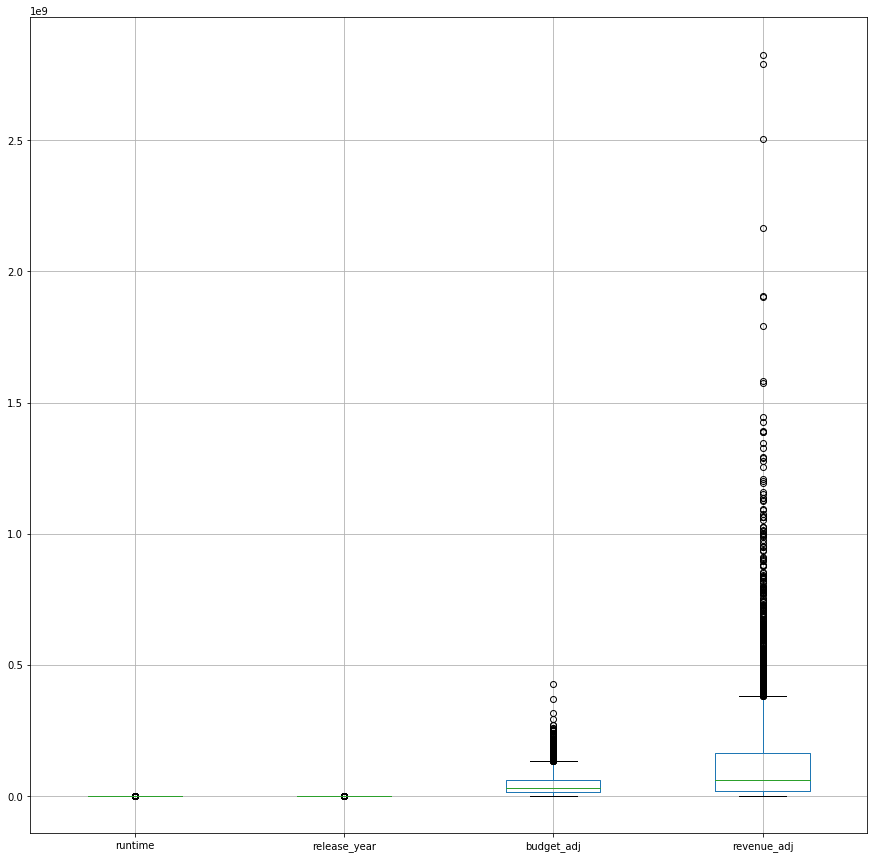

In [24]:
revenue_budget_2010df.boxplot(figsize=(15,15));

> So now we conclude graphically the following that there are some **Limitations**:
  1. for the budget of the movies the multible outliers makes the mean = 30 million dollars accounting for the error of this dataset I can't filter the movies based on the mean.
  2. same thing goes for revenue there are at least 10 movies with a revenue of more than 1.5 billion dollars and some of them have over 500 million us dollars.

> While i could have replaced some values with the median but it will be misleading. So i didn't.


>**Please note that most of the values are full of error due to bad scraping or data entry**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

<a id='top'></a>
### Getting some required functions

In [25]:
def draw_bar(top,column,x_axis,y_axis,name):
    plt.style.use('ggplot')
    #giving the figure size(width, height)
    plt.figure(figsize=(30,10))
    # name of the axis
    plt.xlabel(x_axis, fontsize = 20)
    plt.ylabel(y_axis, fontsize=20)
    #Name of the graph
    plt.title(name, fontsize=35)
    #giving a histogram plot
    plt.bar(top[x_axis],top[y_axis])
    #displays the plot
    plt.show()

In [26]:
def draw_hist(dataframe,column):
    plt.style.use('dark_background')
    # figure size
    plt.figure(figsize=(10,5))
    #giving a histogram plot
    plt.hist(dataframe[column],bins=int(dataframe.shape[0]/100))
    #displays the plot
    plt.show()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [27]:
# function get top (criteria,number,data frame)
def get_top(dataframe,number,criteria):
    top_data = dataframe.nlargest(number,criteria)
    return top_data


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

.<a id='q1'></a>
## Is a certain genre more successful than others? / Which genres are most popular? 

In [28]:
genres_df.genres

id
135397          Action|Adventure|Science Fiction|Thriller
76341           Action|Adventure|Science Fiction|Thriller
262500                 Adventure|Science Fiction|Thriller
140607           Action|Adventure|Science Fiction|Fantasy
168259                              Action|Crime|Thriller
281957                   Western|Drama|Adventure|Thriller
87101           Science Fiction|Action|Thriller|Adventure
286217                    Drama|Adventure|Science Fiction
211672                  Family|Animation|Adventure|Comedy
150540                            Comedy|Animation|Family
206647                             Action|Adventure|Crime
76757            Science Fiction|Fantasy|Action|Adventure
264660                              Drama|Science Fiction
257344                      Action|Comedy|Science Fiction
99861                    Action|Adventure|Science Fiction
273248                        Crime|Drama|Mystery|Western
260346                              Crime|Action|Thriller
102899     

If we look at the genres column we see some of the data are separated with (|) which might make the analysis hard so let's start by solving this issue:

Now we see how we could separate these values and for this, i looked for some <a href=https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587/3 ><b>help</b></a>.

In [29]:
def split_data(df,col):
    df = df[col].str.split("|", expand=True)
    df = df.stack()
    df = pd.DataFrame(df)
    df.rename(columns={0:f'{col}_adj'},inplace=True)
    return df
   

let's make another data frame with genres first

In [30]:
df_genres=genres_df[['genres']].copy()

In [31]:

df_genres = split_data(df_genres,'genres') 

In [32]:
count = df_genres.genres_adj.value_counts()

**From the above information we see:**
   1. The genre for most of the films in our dataset(after cleaning) is Drama.
   2. Top 4 genres were Drama, Comedy, Thriller, Action. 
> here are the graphs for the above data

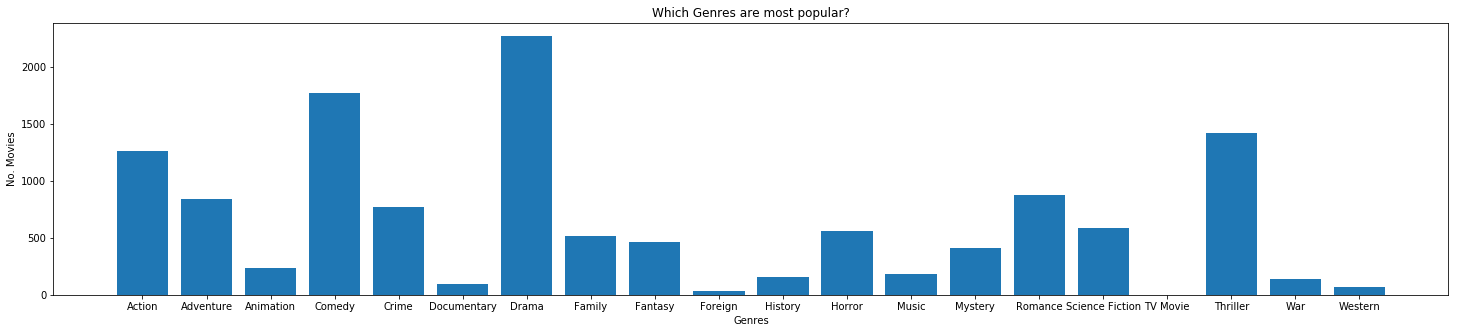

In [33]:
plt.figure(figsize =(25, 5));
plt.title("Which Genres are most popular?")
plt.xlabel('Genres')
plt.ylabel("No. Movies")
plt.bar(count.index,count);

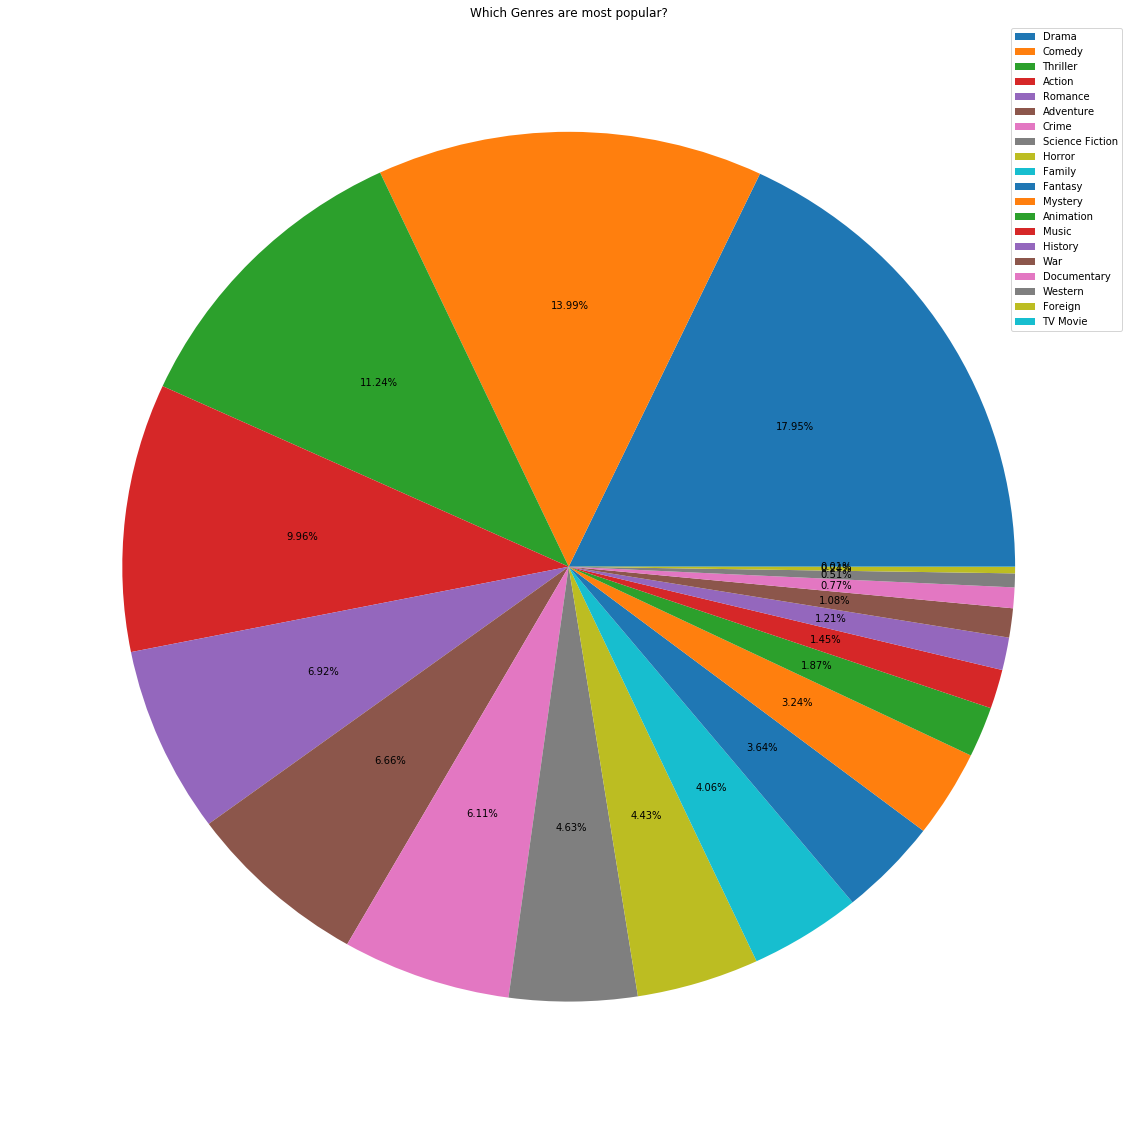

In [34]:
plt.figure(figsize =(20, 20));
plt.title("Which Genres are most popular?")
plt.pie(count, autopct='%1.2f%%', radius=1);
plt.legend(count.index, loc="upper right");

### This answer the second part of our question (which genres are most popular ?)
> You see the most popular genres are: Drama, Comedy, Thriller and Action.


### To find out (Is a certain genre more succesful than the others?) lets get the top 2000 movies and look at there genres
> **Limitations**  as you saw from the data earlier a one movie could have a multible differnt genres which make them overlap.

In [35]:
top_2000 = get_top(genres_df,2000,'revenue_adj')

In [36]:
top_genres =top_2000.merge(df_genres, left_index=True, right_index=True)

In [37]:
count2 = top_genres.genres_adj.value_counts()

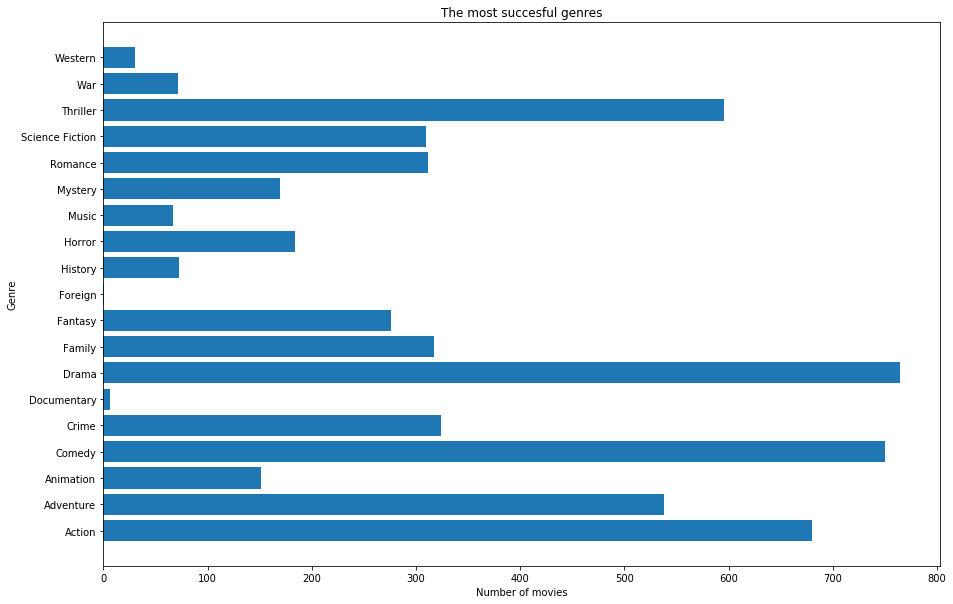

In [38]:
plt.figure(figsize =(15, 10));
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('The most succesful genres')
plt.barh(count2.index,count2);

> Drama and Comedy are more succesful than the others.

> **As you can see if you want your movie to be successful your movie should be in  the genres of: Drama, Comedy,  Thriller, Action or a mix of them as most movies in this dataset are.**



<a id='q2'></a><b> Question 2:Top 10 movies revenue wise. <b> 

In [39]:
top_revenue = get_top(revenue_budget_2010df,10,'revenue_adj')
top_revenue[['original_title','revenue_adj']]

,original_title,revenue_adj
id,,
19995,Avatar,2.827124e+09
11,Star Wars,2.789712e+09
597,Titanic,2.506406e+09
9552,The Exorcist,2.167325e+09
578,Jaws,1.907006e+09
140607,Star Wars: The Force Awakens,1.902723e+09
601,E.T. the Extra-Terrestrial,1.791694e+09
1642,The Net,1.583050e+09
12230,One Hundred and One Dalmatians,1.574815e+09


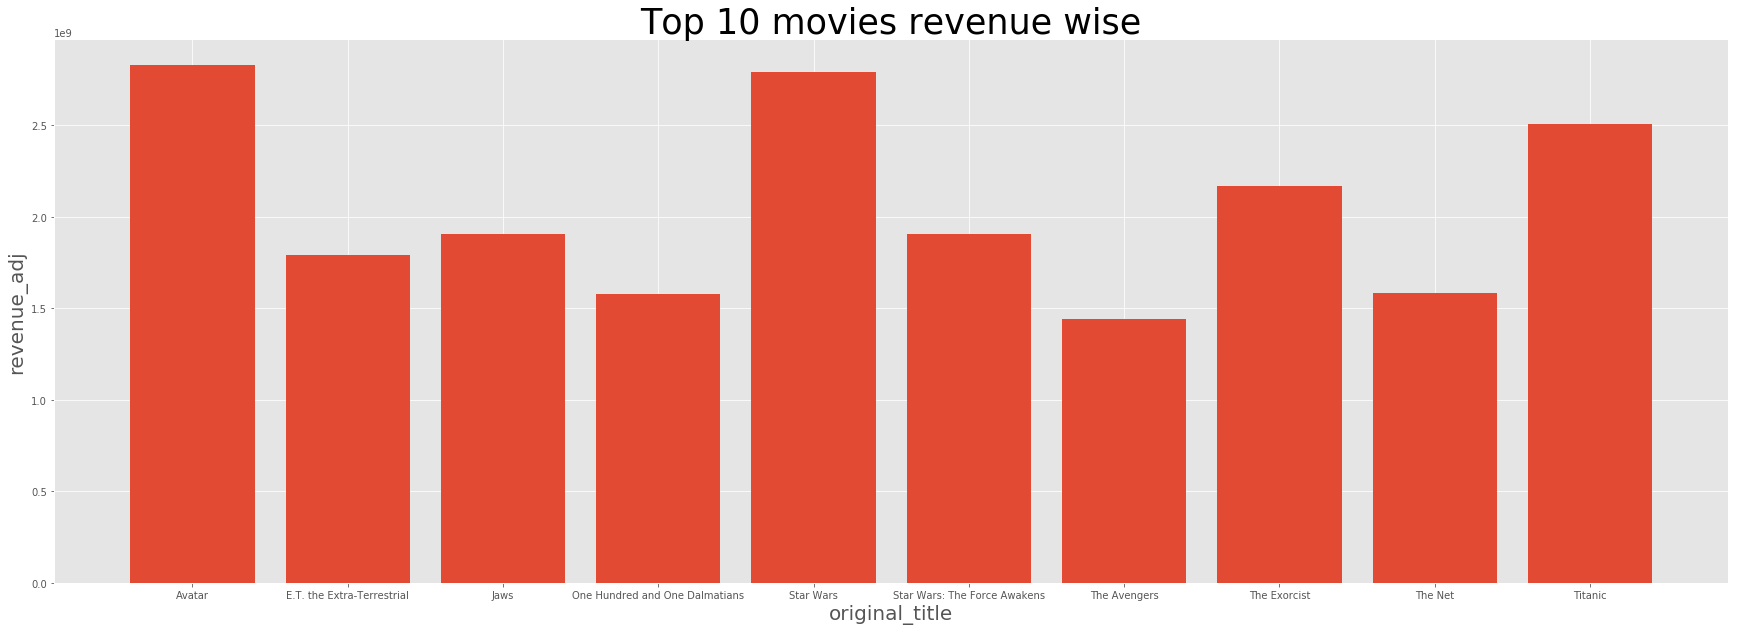

In [40]:
draw_bar(top_revenue,'revenue_adj','original_title','revenue_adj','Top 10 movies revenue wise')

In [41]:
top_revenue[['original_title','revenue_adj']].describe()

,revenue_adj
count,1.000000e+01
mean,2.049305e+09
std,5.048742e+08
min,1.443191e+09
25%,1.635211e+09
50%,1.904864e+09
75%,2.421636e+09
max,2.827124e+09


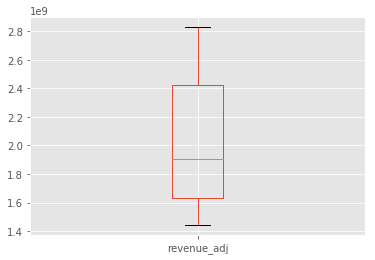

In [42]:
top_revenue[['original_title','revenue_adj']].boxplot();

> **From the above informations and plots** 
    > <p>we see that the top 10 movies are:
        
         Avatar
         Star Wars
         Titanic
         The Exorcist
         Jaws
         Star Wars: The Force Awakens
         E.T. the Extra-Terrestrial
         The Net
         One Hundred and One Dalmatians
         The Avengers
   </p>

> We see the one with the least revenue is *The Avengers* with a revenue of **1.44 billion US dollars**.

> *Avatar*, Is the Top 1 movie with a revenue greater than **2.82 billion dollars.**

> 6 movies have generated a revenue that is less than 2 billion dollars and more than 1.44 billion.

> 4 movies made a revenue more than 2 billion and less than 2.83 billion.
#### > Please note that all revenue are in terms of 2010 US dollars

<a id='q3'></a>
## What kinds of properties are associated with movies that have high revenues?

> To answer this question we will use the insights we gather so far and look for a few more variables like the cast i.e Does having certain people increase the chances of a movie being succesful. 

In [43]:
cast_df = genres_df[['cast']].copy()


In [44]:
cast_df = split_data(cast_df,'cast')
count3 = cast_df.cast_adj.value_counts()


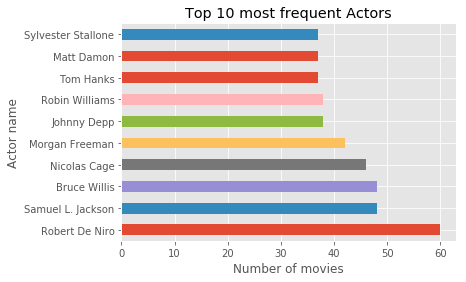

In [45]:
plt.xlabel('Number of movies')
plt.ylabel('Actor name')
plt.title('Top 10 most frequent Actors')
count3.head(10).plot.barh()

In [46]:
count3.head(10)

Robert De Niro        60
Samuel L. Jackson     48
Bruce Willis          48
Nicolas Cage          46
Morgan Freeman        42
Johnny Depp           38
Robin Williams        38
Tom Hanks             37
Matt Damon            37
Sylvester Stallone    37
Name: cast_adj, dtype: int64

> **You can see that the most frequent actors were:**  
        Robert De Niro        
        Bruce Willis           
        Samuel L. Jackson      
        Nicolas Cage           
        Morgan Freeman        
        Johnny Depp            
        Robin Williams         
        Tom Hanks              
        Sylvester Stallone     

### Now lets see the most frequent actors in the top 100 movies:

In [47]:
top_100 = get_top(genres_df,100,'revenue_adj')

In [48]:
top_cast =top_100.merge(cast_df, left_index=True, right_index=True)

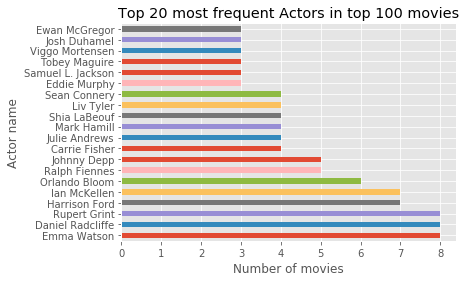

In [49]:
plt.xlabel('Number of movies')
plt.ylabel('Actor name')
plt.title('Top 20 most frequent Actors in top 100 movies')
top_cast.cast_adj.value_counts().head(20).plot.barh();

> **If you want your movies to be successful You should get one of these Actors:**   
    Daniel Radcliffe    
    Emma Watson         
    Rupert Grint       
    Ian McKellen        
    Harrison Ford      
    Orlando Bloom       
    Ralph Fiennes       
    Johnny Depp         
    Julie Andrews       
    Carrie Fisher       
    Sean Connery        
    Mark Hamill         
    Shia LaBeouf        
    Liv Tyler           
    Ian McDiarmid       
    Gary Oldman         
    Elijah Wood         
    Geoffrey Rush       
    Josh Duhamel        
    Tom Hanks           

### most frequent director : 

In [50]:
director_df = genres_df[['director']].copy()

In [51]:
director_df = split_data(director_df,'director')

In [52]:
directors_count = director_df.director_adj.value_counts()

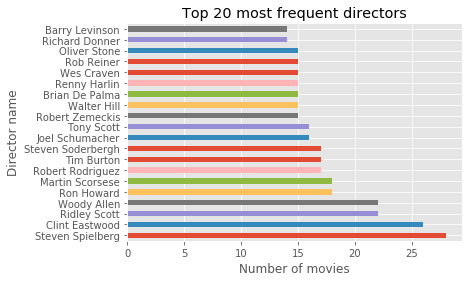

In [53]:
plt.xlabel('Number of movies')
plt.ylabel('Director name')
plt.title('Top 20 most frequent directors')
directors_count.head(20).plot.barh();

### You can see that the most frequent actors are: 
> 
    Steven Spielberg    
    Clint Eastwood       
    Woody Allen          
    Ridley Scott         
    Martin Scorsese      
    Ron Howard           
    Tim Burton           
    Steven Soderbergh    
    Robert Rodriguez     
    Joel Schumacher      
    Tony Scott           
    Wes Craven           
    Renny Harlin         
    Walter Hill         
    Oliver Stone         
    Brian De Palma       
    Robert Zemeckis      
    Rob Reiner           
    Richard Donner       
    Barry Levinson       

#### Now same as we did with the actors:

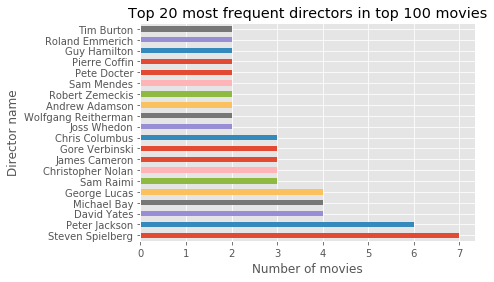

In [54]:
plt.xlabel('Number of movies')
plt.ylabel('Director name')
plt.title('Top 20 most frequent directors in top 100 movies')
top_directors =top_100.merge(director_df, left_index=True, right_index=True)
top_directors.director_adj.value_counts().head(20).plot.barh();

#### So if you want your movie to be successful you should seek out any of the above directors

### relationship between budget and revenue

In [55]:
top_500 = get_top(revenue_budget_2010df,500,'revenue_adj')

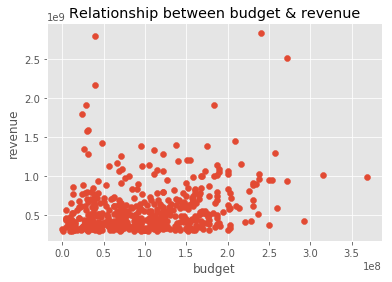

In [56]:
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Relationship between budget & revenue')
plt.scatter(top_500.budget_adj,top_500.revenue_adj)

> As you can see there is a positive correlation between budget and revenue.

  while correlation does not imply causation, you can see that some movies had spent huge budgets but didn't have huge revenue as others.

In [57]:
# get the mean budget requried for successful movies
top_500.budget_adj.mean()

102703346.54050995

### So successful movies should have any of the above directors and actors and should have a budget of  over 100 million dollars.

<a id='conclusions'></a>
## Conclusions

### For question 1 :which genres are most popular ?
> You see the most popular genres are: Drama, Comedy, Thriller and Action.

### For question 2: top 10 movies
> We see the one with the least revenue is The Avengers with a revenue of 1.44 billion US dollars.   
  Avatar, Is the Top 1 movie with a revenue greater than 2.82 billion dollars.

### For question 3: what kind of properties are associated with movies with high revenues
> actors should be any of these: 
    Daniel Radcliffe
    Emma Watson
    Rupert Grint
    Ian McKellen
    Harrison Ford
    Orlando Bloom
    Ralph Fiennes
    Johnny Depp
    Julie Andrews
    Carrie Fisher
    Sean Connery
    Mark Hamill
    Shia LaBeouf
    Liv Tyler
    Ian McDiarmid
    Gary Oldman
    Elijah Wood
    Geoffrey Rush
    Josh Duhamel
    Tom Hanks
    
> directors should be any of these
    Steven Spielberg    
    Clint Eastwood       
    Woody Allen          
    Ridley Scott         
    Martin Scorsese      
    Ron Howard           
    Tim Burton           
    Steven Soderbergh    
    Robert Rodriguez     
    Joel Schumacher      
    Tony Scott           
    Wes Craven           
    Renny Harlin         
    Walter Hill         
    Oliver Stone         
    Brian De Palma       
    Robert Zemeckis      
    Rob Reiner           
    Richard Donner       
    Barry Levinson

> The movie genre should be : Drama, Comedy, Thriller or Action.

### Data limitations
>As mentioned in the introduction, we have almost half of the movies with zero budgets and zero revenues that might be a problem with the data collection or entry.

> So in counting for the financial figures, it is necessary to limit our analysis to the entries with positive budgets or revenues only.

> some of the entries although having positive figures it's isn't correct ( like the movies having a budget of less than 30 dollars and a revenue of less than 30 dollars), I opted not to use the median or mean to replace those values as this might give us inaccurate insight meanwhile the actual figures of those movies may in fact be large or small. So, i just excluded them when analyzing those attributes.

> some columns have multible values separated by ('|') which made it hard to calculate and the overlap of this data made it hard to calculate the most successful genres and the most frequent cast


In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0